In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#fileName = "syncPulseFclBuilderOutput_T0.txt"
fileName = "syncPulseFclBuilderOutput.txt"

caloVec = [[] for x in range(1,25)]
for x in caloVec:
    for xtal in range(54):
        x.append([])
#print(caloVec)

f = open(fileName, "r")
counter = 0
for i, x in enumerate(f):
    #if(counter > 10):
    #    break
    if("sync pulse time" in x):
        #print(x.split(" "))
        ding = x.split(" ")
        calo = int(ding[5])
        xtal = int(ding[7])
        time = float(ding[9])
        if(time == 0):
            time = np.nan
        #print(calo,xtal, time)
        caloVec[calo-1][xtal].append(time)
        counter += 1
f.close()

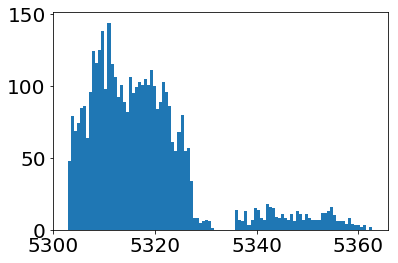

In [3]:
plt.hist(caloVec[0][0],bins=100)
plt.show()

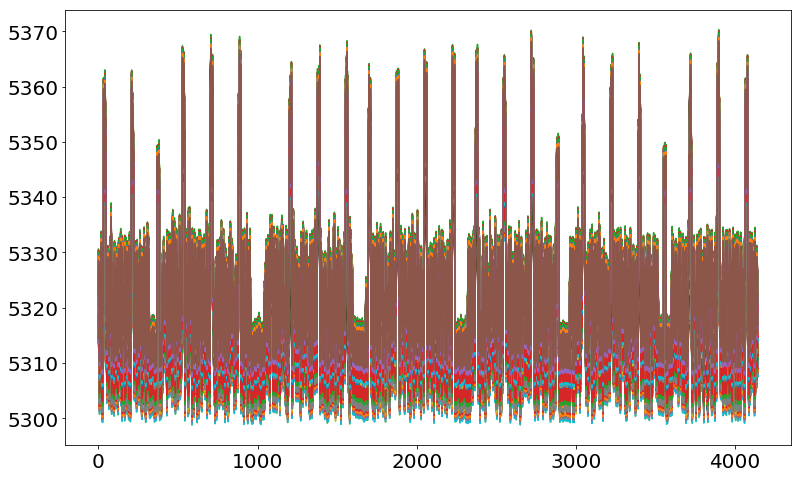

In [4]:
noint()
fig, ax = plt.subplots(figsize=(13,8))
for calo in caloVec:
    for xtal in calo:
        plt.plot(xtal)
        
#plt.ylim(104700,104800)
plt.show()

In [5]:
meanTimeVec = []
for i,calo in enumerate(caloVec):
    for j,xtal in enumerate(calo):
        if(np.mean(xtal) == 0):
            meanTimeVec.append((np.nan,np.nan))
        else:
            meanTimeVec.append((np.nanmean(xtal), np.std(xtal)))

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


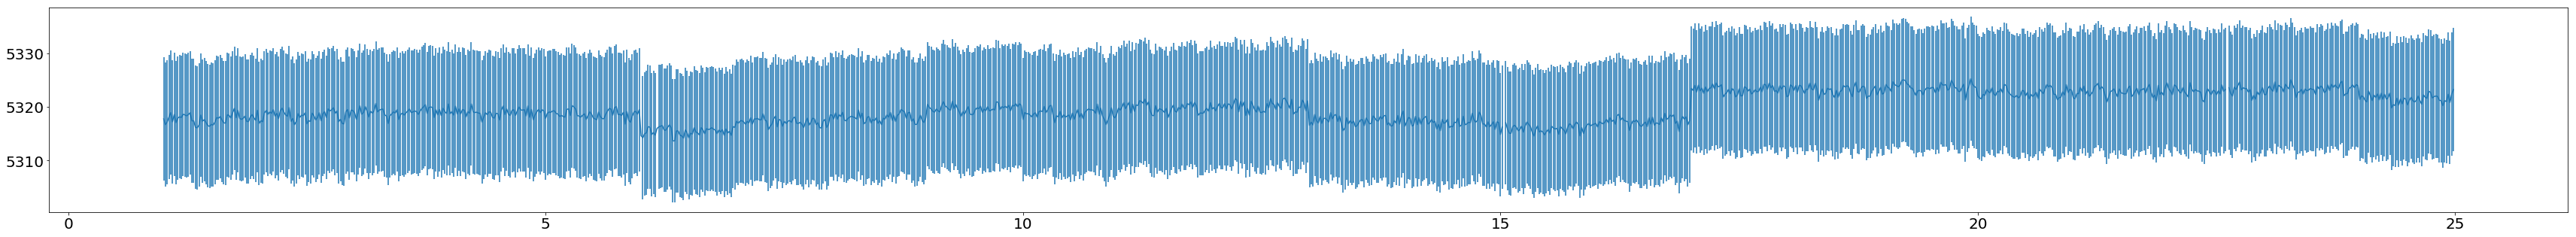

In [6]:
means, stds = zip(*meanTimeVec)
fig,ax = plt.subplots(figsize=(60,5))
plt.errorbar([x/54. + 1 for x in range(len(means))],means,xerr=0,yerr=stds)
#plt.ylim(5300,5350)
plt.show()

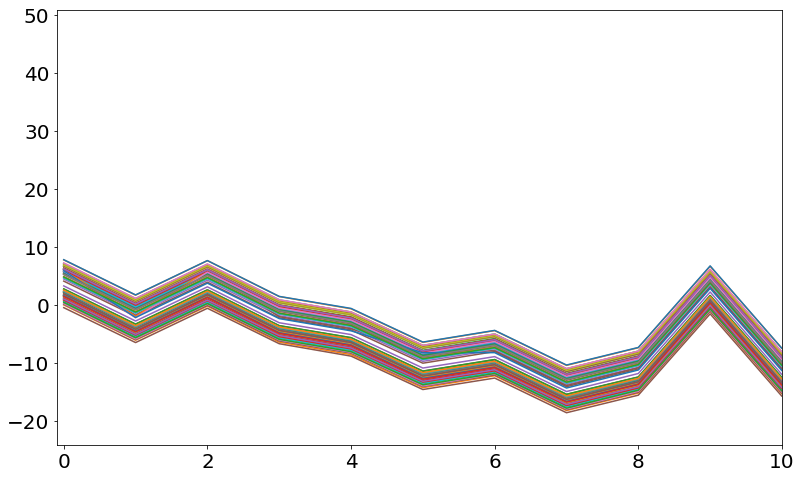

In [8]:
noint()
fig, ax = plt.subplots(figsize=(13,8))
for i, calo in enumerate(caloVec):
    for j, xtal in enumerate(calo):
        plt.plot([x - means[(i-1)*54 + j] for x in xtal])
        
    if(i>0):
        break
        
#plt.ylim(104700,104800)
plt.xlim(-0.1,10)
plt.show()

In [9]:
localMeans = []
for i in range(len(xtal)):
    meansi = []
    for k, calo in enumerate(caloVec):
        for j, xtal in enumerate(calo):
            meansi.append(xtal[i] - means[(k-1)*54 + j])
            
    localMeans.append(np.nanmean(meansi))
    
#print(localMeans)

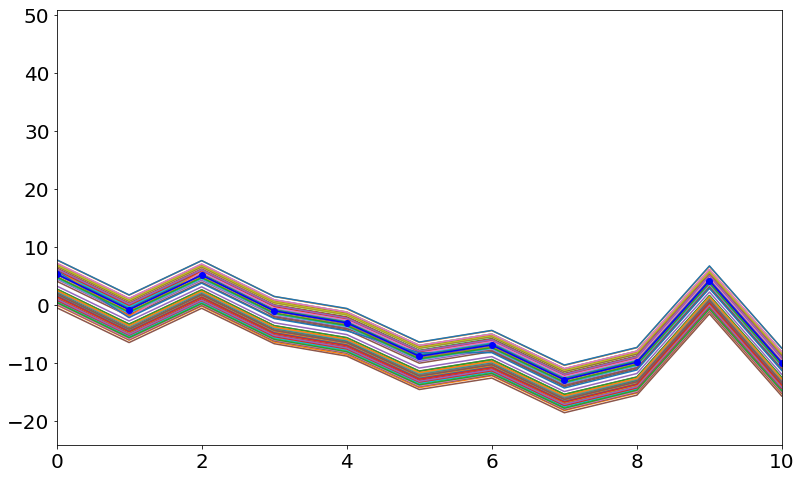

In [10]:
noint()
fig, ax = plt.subplots(figsize=(13,8))
for i, calo in enumerate(caloVec):
    for j, xtal in enumerate(calo):
        plt.plot([x - means[(i-1)*54 + j] for x in xtal])
        
    if(i>0):
        break
        
plt.plot(localMeans,"bo-")
        
#plt.ylim(104700,104800)
plt.xlim(0,10)
plt.show()

In [11]:
newCalos = [[] for x in range(24)]
#print(newCalos)
for i, calo in enumerate(caloVec):
    for j, xtal in enumerate(calo):
        xtalnum = (i-1)*54 + j
        newCalos[i].append([x - means[xtalnum] - localMeans[k] for k, x in enumerate(xtal)])
#print(newCalos)

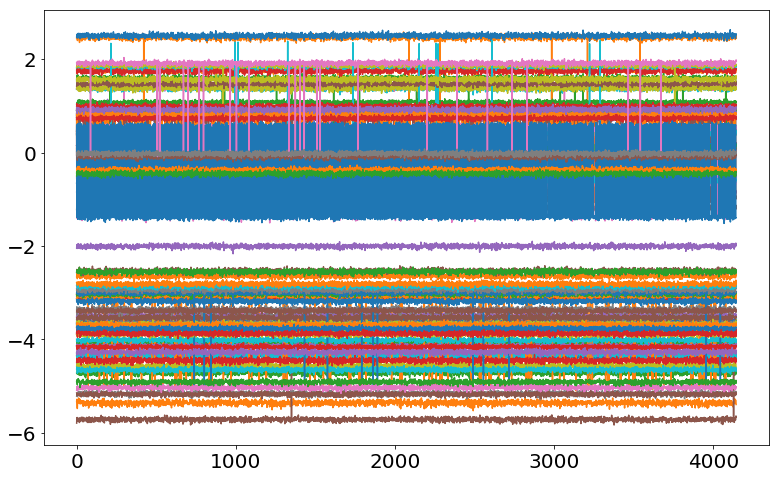

In [12]:
noint()
fig, ax = plt.subplots(figsize=(13,8))
for i, calo in enumerate(newCalos):
    for j, xtal in enumerate(calo):
        #xtalnum = (i-1)*54 + j
        plt.plot(xtal)
        
    if(i>0):
        break
        
#plt.ylim(104700,104800)
#plt.xlim(-1,10)
plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


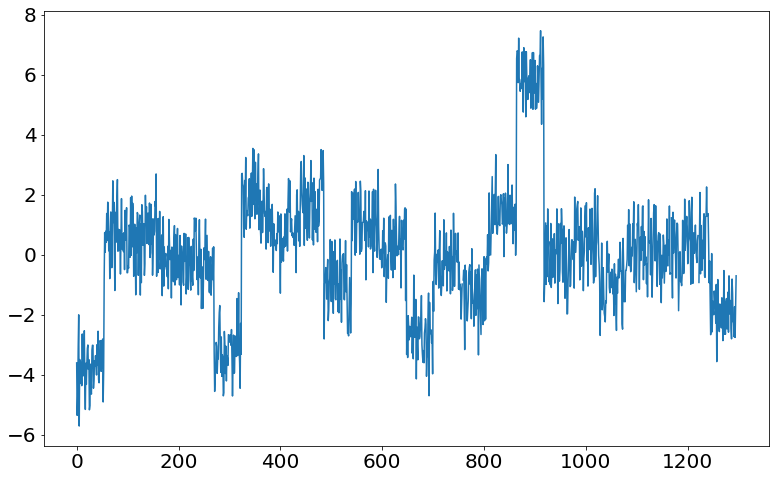

In [13]:
noint()
caloNewMeans = []
fig, ax = plt.subplots(figsize=(13,8))
for i, calo in enumerate(newCalos):
    for j, xtal in enumerate(calo):
        #xtalnum = (i-1)*54 + j
        caloNewMeans.append(np.nanmean(xtal))
        
plt.plot(caloNewMeans)
        
#plt.ylim(104700,104800)
#plt.xlim(-1,10)
plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


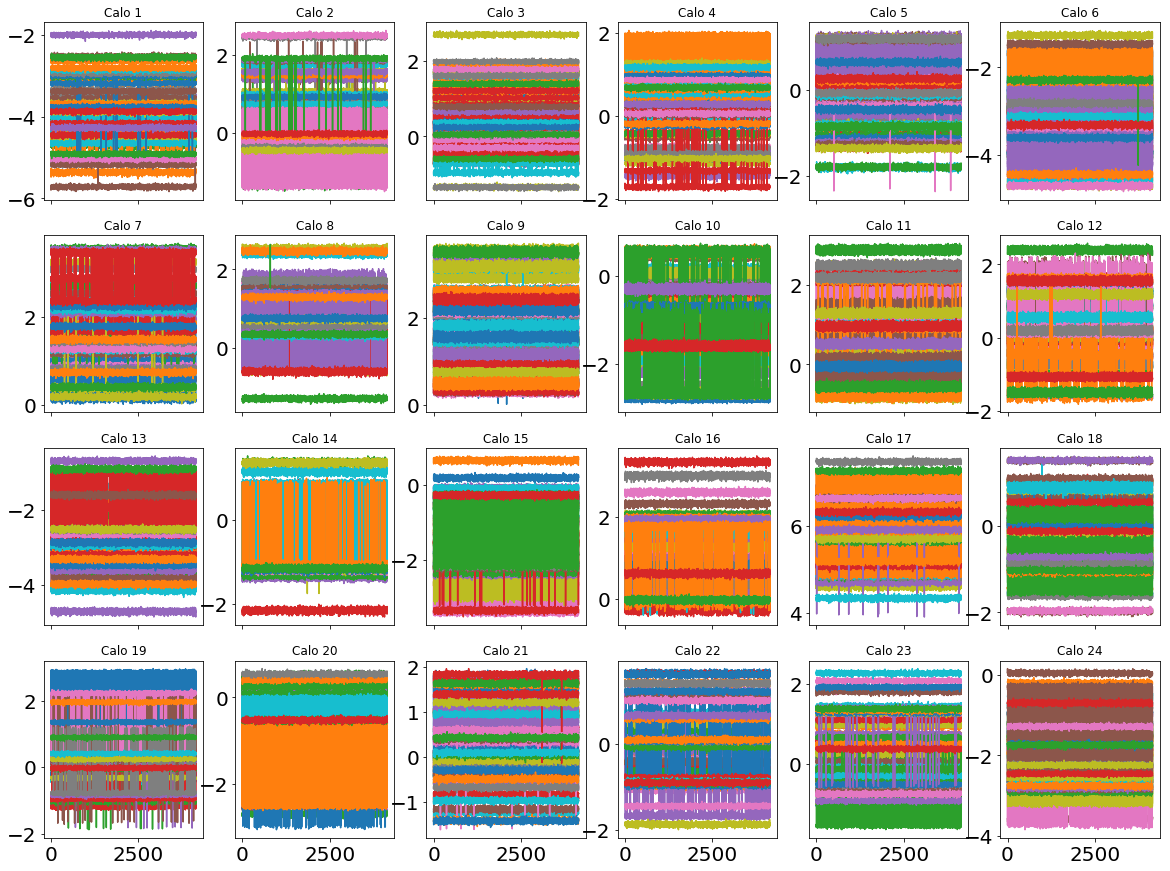

In [17]:
noint()
meansCorr = []
fig, ax = plt.subplots(4,6,figsize=(20,15),sharex=True, sharey=False)
for i, axi in enumerate(ax.flat):
    calo = newCalos[i]
    for j, xtal in enumerate(calo):
        meansCorr.append(np.nanmean(xtal))
        axi.plot(xtal)
    axi.set_title("Calo "+str(i+1))
        
#plt.ylim(104700,104800)
#plt.xlim(-1,10)
plt.tight_layout
plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


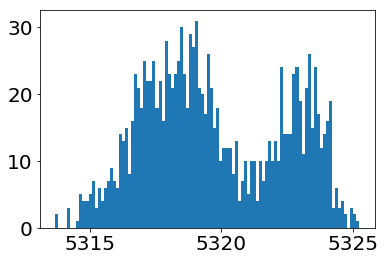

In [18]:
plt.hist(means,bins=100)
plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


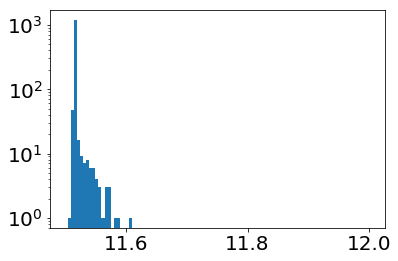

In [19]:
plt.hist(stds,bins=100,range=(11.5,12))
plt.yscale("log")
plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


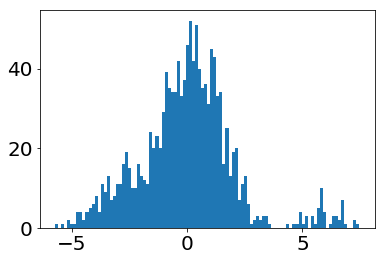

In [20]:
plt.hist(meansCorr, bins=100)
plt.show()

--- 

# Now lets construct the sync pulse fcl file 

In [21]:
outfile = "./syncPulseAverageTimes.fcl"
fout = open(outfile, "w")

fout.write("// Sync pulse average times for nearline alarm\n")
fout.write("// Josh LaBounty --- May 5, 2019\n")
fout.write("// Created using Jypyter Notebook because I'm technologically illiterate.\n")

fout.write("BEGIN_PROLOG\n")
fout.write("nearline_sync_timing_constants : {\n")

#for i, xtalMean in enumerate(means):
for i, xtalMean in enumerate(meansCorr):
    if(np.isnan(xtalMean)):
        xtalMean = 0
    outString = "     Calo"+str(int(np.floor(i/54)+1))+"Xtal"+str(int(i % 54))+" : " + str(xtalMean)+"\n"
    #print(outString)
    fout.write(outString)
    
fout.write("}\n")
fout.write("END_PROLOG\n")

fout.close()

print("All done.")

All done.
